### EDA of the TACO dataset

In [84]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


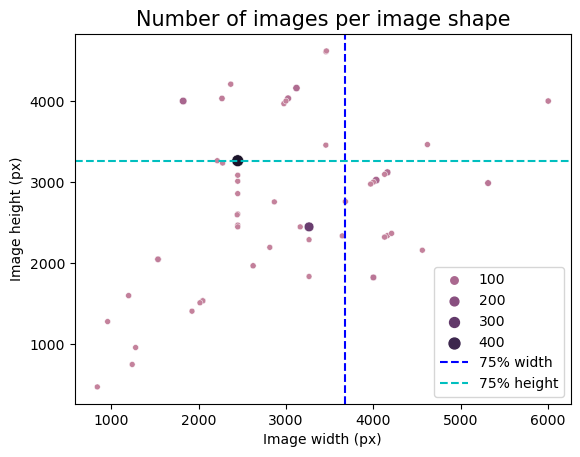

In [85]:
# As the files come from different sources, they have different sizes
widths = []
heights = []
shape_freqs = []
img_shapes_keys = {}


IMAGE_DIR = './data/all_images'


for filename in os.listdir(IMAGE_DIR):
    if filename.endswith('.jpg'):
        with Image.open(os.path.join(IMAGE_DIR, filename)) as img:
            key = str(img.size[0]) + '-' + str(img.size[1])
            if key in img_shapes_keys:
                shape_id = img_shapes_keys[key]
                shape_freqs[shape_id] += 1
            else:
                img_shapes_keys[key] = len(widths)
                widths.append(img.size[0])
                heights.append(img.size[1])
                shape_freqs.append(1)


d = {'Image width (px)': widths, 'Image height (px)': heights, '# images': shape_freqs}
df = pd.DataFrame(d)

p75_width = np.percentile(widths, 75)
p75_height = np.percentile(heights, 75)


cmap = sns.cubehelix_palette(dark=.1, light=.6, as_cmap=True)
plot = sns.scatterplot(x="Image width (px)", y="Image height (px)", size='# images', hue="# images", palette=cmap, data=df)
plot = plot.set_title('Number of images per image shape', fontsize=15)

plot = plt.axvline(p75_width, color='b', linestyle='--', label='75% width')
plot = plt.axhline(p75_height, color='c', linestyle='--', label='75% height')
plot= plt.legend()
